<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Logo_DuocUC.svg/2560px-Logo_DuocUC.svg.png' width=50%, height=20%>

## Intoducción

En este ejercicio compararemos varios modelos de "ensamblado" para un problema de clasificación.

**Debes generar en cada celda de código una celda de texto que explique lo que se hace e interpretar los resultados (métricas) cuando corresponda.
Finalmente, generar una CONCLUSION con tu análisis. Comparando y justificando en forma adecuada, cual fue el mejor modelo aplicado en este caso.**

Para ello utilizaremos el dataset de  Estabilidad de una Matriz Eléctrica.


https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+

La estabilidad en una matriz energética del país es de suma importancia para el progreso economico y el bienestar de sus habitantes (solo tener presente la sensación de inseguridad, malestar, etc. que se puede generar con un corte no previsto puede afectar el mercado económico y el bienestar de una población)

El desafio es tratar de determinar si la red es estable (columna ```stabf```) basado en un conjunto de caracteristicas disponibles:


1. tau[x]: reaction time of participant (real from the range [0.5,10]s). Tau1 - the value for electricity producer. 
2. p[x]: nominal power consumed(negative)/produced(positive)(real). For consumers from the range [-0.5,-2]s^-2; p1 = abs(p2 + p3 + p4) 
3. g[x]: coefficient (gamma) proportional to price elasticity (real from the range [0.05,1]s^-1). g1 - the value for electricity producer. 
4. stab: the maximal real part of the characteristic equation root (if positive - the system is linearly unstable)(real) 
5. stabf: the stability label of the system (categorical: stable/unstable) 


Estos datos fueron usados en el paper: "Towards Concise Models of Grid Stability"



## Antes de empezar modelar

In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv')

X = df.drop(['stab','stabf'],axis=1)
Y = df['stabf']

## Bagging

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2)
mo = DecisionTreeClassifier() 
model = BaggingClassifier(mo, n_estimators=10)

params = {"base_estimator__max_depth": [2,3],
          "max_samples": [0.1,0.2],
          "base_estimator__min_samples_split": [2,3,4]} 
grid = GridSearchCV(estimator=model, param_grid=params,cv=5)
_=grid.fit(Xtrain, Ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_est

In [3]:
print(grid.best_score_)
print(grid.best_params_)
#pd.DataFrame(grid.cv_results_)

0.8067500000000001
{'base_estimator__max_depth': 3, 'base_estimator__min_samples_split': 3, 'max_samples': 0.1}


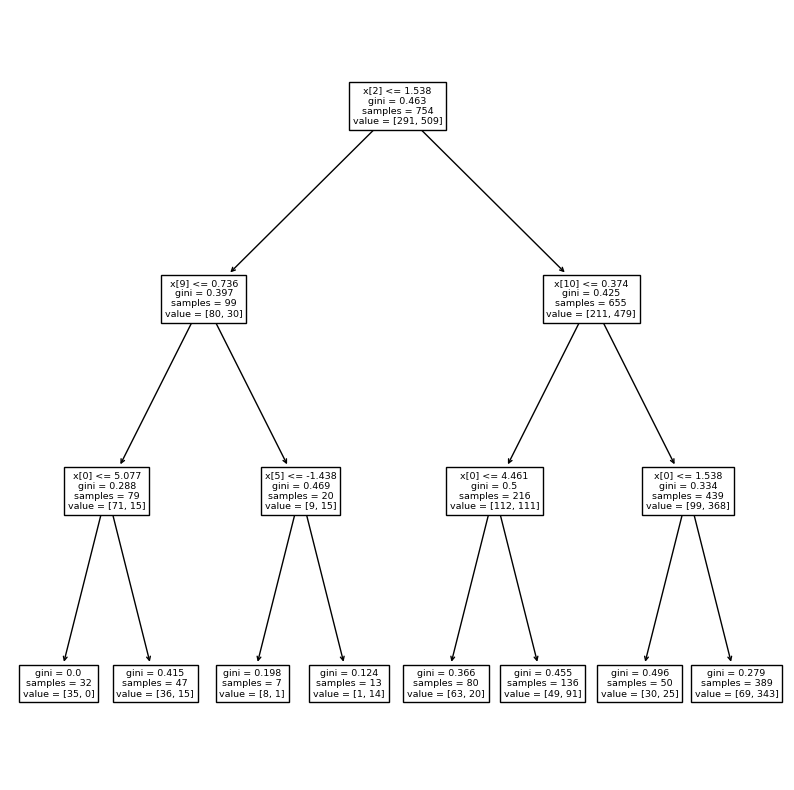

In [4]:
# Visualizamos 1 sólo árbol dentro del "bosque" generado por Bagging
import matplotlib.pyplot as plt
from sklearn import tree

mo_ = grid.best_estimator_.estimators_[0]
plt.subplots(1,1,figsize=(10,10))
_= tree.plot_tree(mo_) 

In [5]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Yhat = grid.predict(Xtest)
print(confusion_matrix(Ytest, Yhat))
print(classification_report(Ytest, Yhat))

[[ 374  338]
 [  70 1218]]
              precision    recall  f1-score   support

      stable       0.84      0.53      0.65       712
    unstable       0.78      0.95      0.86      1288

    accuracy                           0.80      2000
   macro avg       0.81      0.74      0.75      2000
weighted avg       0.80      0.80      0.78      2000



**Usar otra función de scoring/loss para elegir el "mejor" modelo**



*   Funciones pre-definidas: 
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

*   Funciones personalizadas: 
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring

In [6]:
grid = GridSearchCV(estimator=model, param_grid=params,cv=10, scoring='accuracy')
grid.fit(Xtrain, Ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_est

GridSearchCV(cv=10,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier()),
             param_grid={'base_estimator__max_depth': [2, 3],
                         'base_estimator__min_samples_split': [2, 3, 4],
                         'max_samples': [0.1, 0.2]},
             scoring='accuracy')

In [7]:
print(grid.best_score_)
print(grid.best_params_)

0.8065
{'base_estimator__max_depth': 3, 'base_estimator__min_samples_split': 4, 'max_samples': 0.1}


In [8]:
pd.DataFrame(grid.cv_results_).iloc[grid.best_index_]

mean_fit_time                                                                       0.096655
std_fit_time                                                                        0.023099
mean_score_time                                                                     0.007837
std_score_time                                                                       0.00157
param_base_estimator__max_depth                                                            3
param_base_estimator__min_samples_split                                                    4
param_max_samples                                                                        0.1
params                                     {'base_estimator__max_depth': 3, 'base_estimat...
split0_test_score                                                                    0.80875
split1_test_score                                                                     0.8075
split2_test_score                                                     

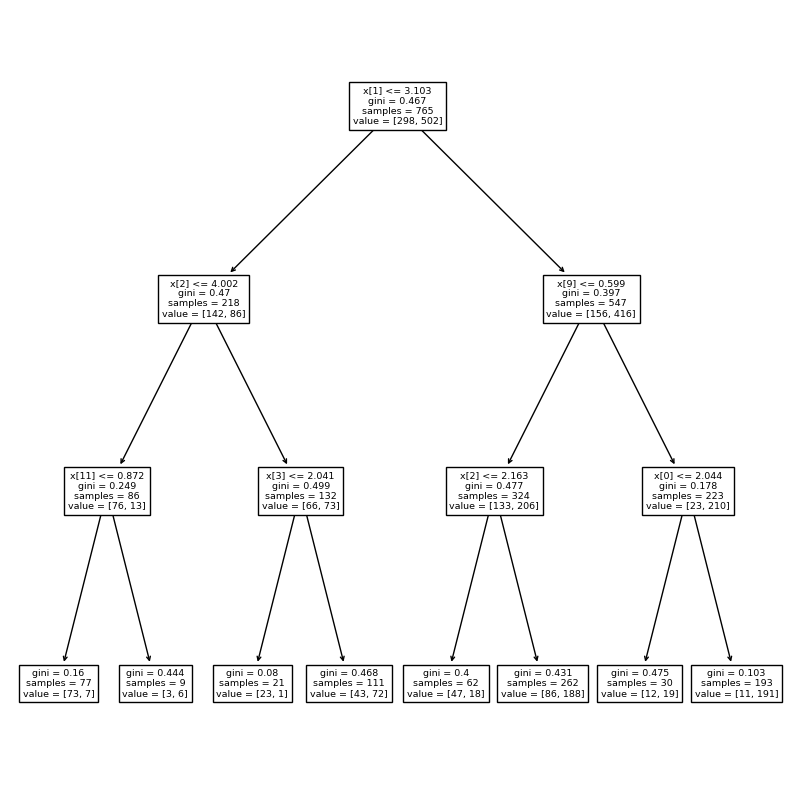

In [9]:
# Visualizamos el árbol ganador!
import matplotlib.pyplot as plt
from sklearn import tree

mo_ = grid.best_estimator_.estimators_[0]
plt.subplots(1,1,figsize=(10,10))
_= tree.plot_tree(mo_) 

##RandomForest

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2)

model = RandomForestClassifier()

params = {"n_estimators": [10],
          "max_depth": [2,3], 
          "min_samples_split": [2,3,4],
          "max_leaf_nodes": [5,8]}

grid = GridSearchCV(estimator=model, param_grid=params,cv=5)
_=grid.fit(Xtrain, Ytrain)

In [11]:
print(grid.best_score_)
print(grid.best_params_)
#pd.DataFrame(grid.cv_results_)

0.776375
{'max_depth': 3, 'max_leaf_nodes': 8, 'min_samples_split': 3, 'n_estimators': 10}


In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Yhat = grid.predict(Xtest)
print(confusion_matrix(Ytest, Yhat))
print(classification_report(Ytest, Yhat))

[[ 281  435]
 [  36 1248]]
              precision    recall  f1-score   support

      stable       0.89      0.39      0.54       716
    unstable       0.74      0.97      0.84      1284

    accuracy                           0.76      2000
   macro avg       0.81      0.68      0.69      2000
weighted avg       0.79      0.76      0.73      2000



##AdaBoost

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2)

mo = DecisionTreeClassifier() 
model = AdaBoostClassifier(mo)

params = {"n_estimators": [10],
          "base_estimator__max_depth": [2,3], 
          "base_estimator__min_samples_split": [2,3,4], 
          "base_estimator__max_leaf_nodes": [5,8]}

grid = GridSearchCV(estimator=model, param_grid=params,cv=5)
_=grid.fit(Xtrain, Ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'ba

In [14]:
print(grid.best_score_)
print(grid.best_params_)
#pd.DataFrame(grid.cv_results_)

0.883
{'base_estimator__max_depth': 3, 'base_estimator__max_leaf_nodes': 8, 'base_estimator__min_samples_split': 2, 'n_estimators': 10}


In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Yhat = grid.predict(Xtest)
print(confusion_matrix(Ytest, Yhat))
print(classification_report(Ytest, Yhat))

[[ 619  111]
 [  91 1179]]
              precision    recall  f1-score   support

      stable       0.87      0.85      0.86       730
    unstable       0.91      0.93      0.92      1270

    accuracy                           0.90      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.90      0.90      0.90      2000



##Gradient Boosting

**INVESTIGA Y EXPLICA como funciona este modelo**

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2)

model = GradientBoostingClassifier()

params = {"n_estimators": [10],
          "max_depth": [2,3], 
          "min_samples_split": [2,3,4], 
          "max_leaf_nodes": [5,8]}

grid = GridSearchCV(estimator=model, param_grid=params,cv=5)
_=grid.fit(Xtrain, Ytrain)

In [17]:
print(grid.best_score_)
print(grid.best_params_)
#pd.DataFrame(grid.cv_results_)

0.780375
{'max_depth': 3, 'max_leaf_nodes': 8, 'min_samples_split': 2, 'n_estimators': 10}


In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Yhat = grid.predict(Xtest)
print(confusion_matrix(Ytest, Yhat))
print(classification_report(Ytest, Yhat))

[[ 306  432]
 [  23 1239]]
              precision    recall  f1-score   support

      stable       0.93      0.41      0.57       738
    unstable       0.74      0.98      0.84      1262

    accuracy                           0.77      2000
   macro avg       0.84      0.70      0.71      2000
weighted avg       0.81      0.77      0.74      2000

